# Data Mining Exercise 6

### 6.1. Modeling characteristics of fish 
The Fish dataset is a simple dataset which helps to illustrate the linear and non-linear dependencies 
which may exist between different attributes of the data. The dataset is provided in the fish.csv file. 
It contains 44 examples, each with four attributes: age, water temperature, weight and length

#### 1. Load the Fish dataset and visualize it by combining different attributes. Can you make an assumption about the function to predict the length and weight based on one of the variables?

In [1]:
#Import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

fish = pd.read_csv("fish.csv")
display(fish.head())
display(fish.shape)
display(fish.describe())

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_1645/1616210978.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,temp,weight,length
0,14,25,100,620
1,28,25,40,1315
2,41,25,78,2120
3,55,25,99,2600
4,69,25,163,3110


(44, 4)

,age,temp,weight,length
count,44.000000,44.000000,44.000000,44.000000
mean,83.181818,28.000000,180.386364,3107.431818
std,44.522935,2.261919,90.343843,1328.962883
min,14.000000,25.000000,21.000000,590.000000
25%,41.000000,26.500000,107.500000,2135.000000
50%,83.000000,28.000000,173.000000,3197.000000
75%,125.000000,29.500000,250.000000,4500.000000
max,153.000000,31.000000,401.000000,4600.000000


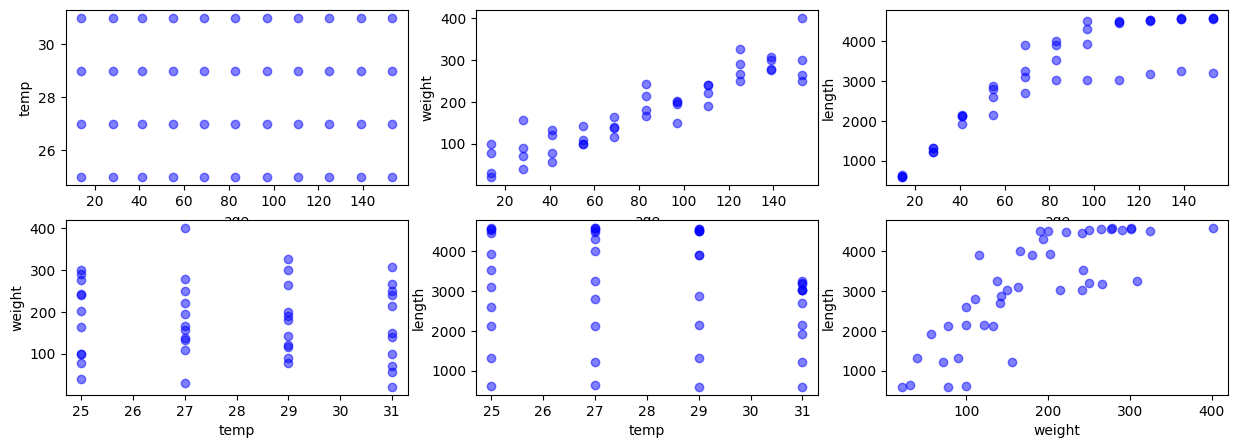

In [2]:
import itertools; 
import matplotlib.pyplot as plt 

features = ['age','temp','weight','length']

combinations = itertools.combinations(features,2)

fig = plt.figure(figsize = (15,5))

figure_index = 1
for combination in combinations:
    axs = fig.add_subplot(2,3,figure_index)
    axs.scatter(fish[combination[0]],fish[combination[1]], color = 'blue', alpha = 0.5)
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
    
    figure_index += 1

plt.show()


# After examining the visualizations, it seems that there is a linear relationship between fish age 
# and weight. Additionally, it appears that fish length is influenced by age.

#### 2. Learn a linear regression model based on the combination of attributes you find most convenient for length and for weight (one regression using length as label, and one regression using weight as label). Which types of regression work best? Do they apply equally to all combinations of attributes?

mse 1248.306561483914
r2 0.8268571447122659

coefficeints [[80.73308331]]
intercept [169.]


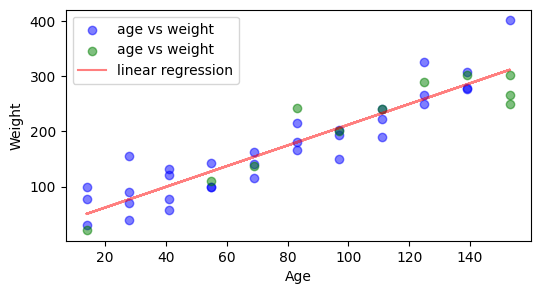

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
#split the dataset
X  = fish['age'].values.reshape(-1,1)
y = fish['weight'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 41)

#preprocessing
estimator = LinearRegression()
scaler = StandardScaler()
pipeline = Pipeline(steps=[('scaler',scaler),('estimator', estimator)])

#fit the model
pipeline.fit(X_train, y_train)

#predict the y values
predictions = pipeline.predict(X_test)

#Evaluation of the model performance 
mse = mean_squared_error(predictions, y_test)
r2 = r2_score(predictions, y_test)

print('mse', mse)
print('r2', r2)
print("")
print('coefficeints' ,pipeline.named_steps['estimator'].coef_)
print('intercept' ,pipeline.named_steps['estimator'].intercept_)

#plot the predictions and the model
pipeline.fit(X,y)
predictions = pipeline.predict(X)
len(predictions)

plt.figure(figsize = (6,3))
plt.scatter(X_train, y_train, color = 'blue',alpha= 0.5, label = 'age vs weight')
plt.scatter(X_test, y_test, color = 'green',alpha= 0.5, label = 'age vs weight')

plt.plot(fish['age'], predictions, color = 'red',alpha= 0.5,linestyle='-', label = 'linear regression')
plt.xlabel('Age')
plt.legend()
plt.ylabel('Weight');

mse 217308.81868219702
r2 0.8182168528845443

polynomial equation y = 0.00x^3 + 1107.98x^2 + -435.54x^1 + 67.39x^0 + 3337.13


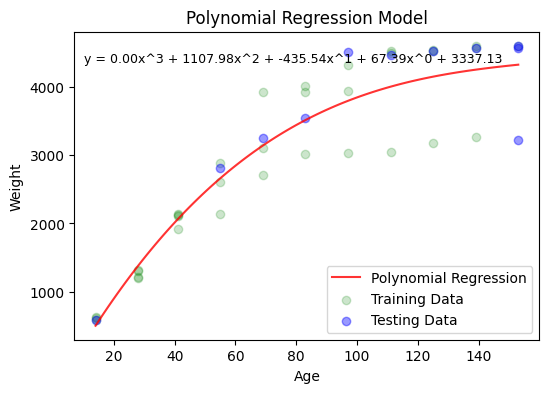

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#split the dataset
X  = fish['age'].values.reshape(-1,1)
y = fish['length'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 41)

#preprocessing
estimator = LinearRegression()
scaler = StandardScaler()
transformer = PolynomialFeatures(degree=3, include_bias= True)
pipeline = Pipeline(steps=[('scaler',scaler),('transformer', transformer),('estimator', estimator)])

#fit the model
pipeline.fit(X_train, y_train)

#predict the y values
predictions = pipeline.predict(X_test)

#Evaluation of the model performance 
mse = mean_squared_error(predictions, y_test)
r2 = r2_score(predictions, y_test)

print('mse', mse)
print('r2', r2)
print("")

# plot trendline equation
coefficients = pipeline.named_steps['estimator'].coef_[0]
intercept = pipeline.named_steps['estimator'].intercept_[0]

trendline_equation = 'y = '
for i in range(len(coefficients)):
    trendline_equation += f'{coefficients[i]:.2f}x^{len(coefficients)-i-1} + '
trendline_equation += f'{intercept:.2f}'

print('polynomial equation', trendline_equation)


# Generate a sequence of evenly spaced age values for smoother prediction
age_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)

predictions = pipeline.predict(age_values)

plt.figure(figsize=(6, 4))
plt.plot(age_values, predictions, color='red', alpha=0.8, linestyle='-', label='Polynomial Regression')

#plot train and test set
plt.scatter(X_train, y_train, color='green', alpha=0.2, label='Training Data')
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Testing Data')

#plot the trend line

# plot trendline equation
coefficients = pipeline.named_steps['estimator'].coef_[0]
intercept = pipeline.named_steps['estimator'].intercept_[0]

plt.text(0.02, 0.9, trendline_equation, fontsize=9, transform=plt.gca().transAxes)

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Polynomial Regression Model')
plt.legend(loc = 'lower right')
plt.show()

#### 3. Measure the performance of the different regression models you learned before. Use 10-fold cross validation and RMSE as well as R2 for evaluation.


r2_Score_matrix 

 [-0.19051025 -1.28833211  0.45038015  0.92449717  0.89696823  0.8936165
  0.34220965  0.91016714  0.93292815  0.90771811]

mean_Squared_matrix 

 [-418068.13740579 -357365.96473519 -502467.68609531 -194574.57556656
 -133279.03581674 -289582.97625235 -257623.59019481 -162630.9179816
 -113263.4797331   -25849.69468233]


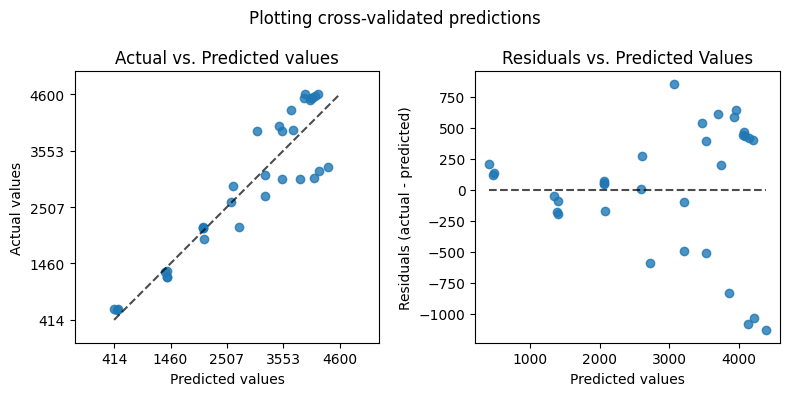

In [5]:
from sklearn.model_selection import cross_val_score,cross_val_predict

cross_val_scores_r2 = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=10)

cross_val_scores_mse = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

print('r2_Score_matrix \n\n' ,cross_val_scores_r2)
print("")
print('mean_Squared_matrix \n\n' ,cross_val_scores_mse)


y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()


### 6.2. Feature Selection 
In this exercise you will explore different feature selection methods for linear regression.

#### 1. First, fit a linear regression model to the “birthweight_train” dataset without any feature selection and evaluate the model on the “birthweight_test” dataset.


In [6]:
birth_train = pd.read_csv('birthweight_train.csv',delimiter=';')
birth_test = pd.read_csv('birthweight_test.csv',delimiter=';')
display('train set:', birth_train.head())
display('test set:' ,birth_test.head())

'train set:'

,LowBirthWeight = Low,LowBirthWeight = Normal,headcirumference,length,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,id,Birthweight
0,0.0,1.0,13.0,19.0,34.0,0.0,26.0,0.0,65.0,140.0,25.0,12.0,25.0,69.0,0.0,0.0,808.0,6.4
1,1.0,0.0,13.0,18.0,35.0,1.0,20.0,35.0,67.0,125.0,23.0,12.0,50.0,73.0,1.0,0.0,516.0,5.8
2,0.0,1.0,13.0,19.0,37.0,0.0,28.0,0.0,62.0,118.0,39.0,10.0,0.0,67.0,0.0,0.0,321.0,6.8
3,0.0,1.0,12.0,19.0,37.0,1.0,19.0,7.0,65.0,132.0,20.0,14.0,0.0,72.0,0.0,0.0,575.0,6.1
4,0.0,1.0,14.0,21.0,38.0,0.0,18.0,0.0,67.0,109.0,20.0,12.0,7.0,67.0,0.0,0.0,1081.0,8.0


'test set:'

,LowBirthWeight = Low,LowBirthWeight = Normal,headcirumference,length,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,id,Birthweight
0,1.0,0.0,12.0,17.0,33.0,0.0,24.0,0.0,58.0,99.0,26.0,16.0,0.0,66.0,1.0,0.0,1313.0,5.8
1,1.0,0.0,12.0,19.0,33.0,1.0,20.0,7.0,63.0,109.0,20.0,10.0,35.0,71.0,1.0,0.0,431.0,4.2
2,1.0,0.0,12.0,18.0,35.0,1.0,41.0,7.0,65.0,125.0,37.0,14.0,25.0,68.0,1.0,1.0,300.0,4.5
3,1.0,0.0,12.0,19.0,37.0,1.0,20.0,7.0,64.0,104.0,20.0,10.0,35.0,73.0,1.0,0.0,1363.0,5.2
4,0.0,1.0,13.0,19.0,38.0,0.0,20.0,0.0,62.0,103.0,22.0,14.0,0.0,70.0,0.0,0.0,822.0,7.5


r2 0.4045457161854187
rmse 1.0599390206226793


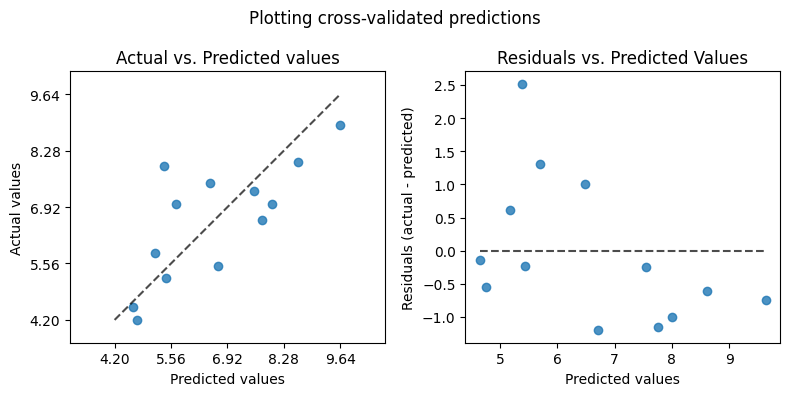

In [7]:
# Splitting the data 
X_train = birth_train.drop(['Birthweight', 'id'], axis=1)
y_train = birth_train['Birthweight']

X_test = birth_test.drop(['Birthweight' , 'id'], axis=1)
y_test = birth_test['Birthweight']

# display(X.shape)
# display(y.shape)

#pipeline setup
estimator = LinearRegression()
pipeline = Pipeline(steps= [('estimator', estimator)]) 

#fit the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# print(pipeline.named_steps['estimator'].coef_)

#Evaluation of the model 
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('r2', r2)
print('rmse', math.sqrt(mse))

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

#### 2. Look at the resulting model and inspect the p-values for each feature. Fit a second regression model using only the significant features (p<=0.05). How does the performance of your model change?


,feature,f value,p value
0,LowBirthWeight = Low,2.476791,0.13
1,LowBirthWeight = Normal,2.476791,0.13
2,headcirumference,19.444167,0.00
3,length,22.885328,0.00
4,Gestation,13.989168,0.00
5,smoker,1.574123,0.22
6,motherage,0.195507,0.66
7,mnocig,2.556162,0.12
8,mheight,2.087771,0.16
9,mppwt,1.818643,0.19


SelectFwe(score_func=<function f_regression at 0x176e82310>)

r2 0.7269176048227058
rmse 0.7178001094989044


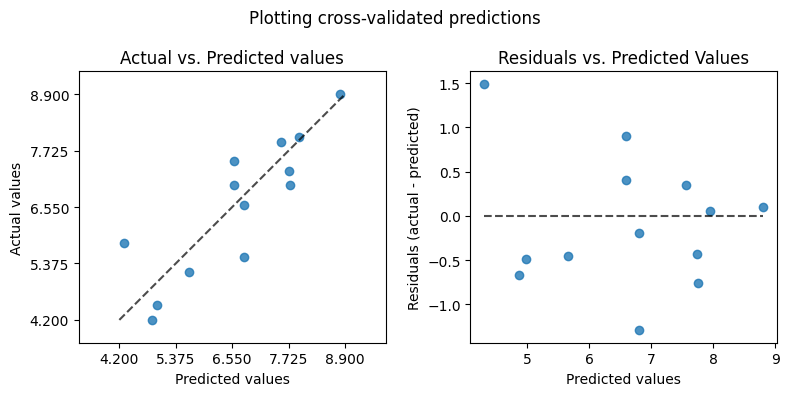

In [8]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFwe

#pipeline setup

#feature selection
f,pvalue = f_regression(X_train,y_train)
#prepare the dataframe and inspect the results
stat = pd.DataFrame({'feature':  X_train.columns,'f value': f,'p value': pvalue })
stat['p value'] = round(stat['p value'], 2)

#show results
display(stat)

#selectFwe -  select k best features
best = SelectFwe(f_regression,alpha= 0.05)
display(best)

estimator = LinearRegression()
pipeline = Pipeline(steps= [('feature_selector', best),('estimator', estimator)]) 

#fit the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


# print(pipeline.named_steps['estimator'].coef_)

#Evaluation of the model 
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('r2', r2)
print('rmse', math.sqrt(mse))

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

#### 3. Look at the new model and inspect the p-values again. Are there any features for which the p-value has changed?


In [9]:
features_train_Selected = best.fit_transform(X_train, y_train)

#run the F-test
f, pval = f_regression(features_train_Selected, y_train) 

#prepare a datframe to inspect the results
new_features_name = [feature_name for (is_used , feature_name) in zip(best.get_support(),X_train.columns)if is_used]

stat = pd.DataFrame({'feature': new_features_name, 'f-value':f,'p-value':pval})
stat['p-value'] = round(stat['p-value'],2)
stat = stat.sort_values('p-value',ascending= False)
display(stat)


,feature,f-value,p-value
0,headcirumference,19.444167,0.0
1,length,22.885328,0.0
2,Gestation,13.989168,0.0


### 6.3. Predicting housing prices in Boston 
The Housing dataset describes 506 houses in the suburbs of Boston in 1993. The data set is provided 
in the housing.csv file. The houses are described by the following 12 continuous attributes and 1 
binary attribute:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's


#### 1. Your task is to find a good regression model for determining the median value of a house (MEDV). You may experiment with different regression methods and parameter tuning. As always, it may help to first visualize different attribute combinations of the data. What are the best RMSE and R2 that you can achieve using the different methods?

In [10]:
df_train = pd.read_csv('housing_train.csv', delimiter=';')
display('train_df',df_train.head())

df_test = pd.read_csv('housing_test.csv',  delimiter=';')
display('test_df',df_test.head())

'train_df'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


'test_df'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
1,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9
2,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,20.45,15.0
3,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,13.27,18.9
4,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,21.02,13.6


In [11]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,354.000000,354.000000,354.00000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.399001,11.426554,11.12709,0.079096,0.554143,6.275890,68.355650,3.857001,9.322034,407.415254,18.524011,12.581384,22.603955
std,7.713956,23.650045,6.95121,0.270271,0.116754,0.725989,28.204173,2.176510,8.638357,167.919024,2.157815,7.355174,9.447900
min,0.006320,0.000000,0.46000,0.000000,0.385000,3.561000,6.200000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.083742,0.000000,5.14500,0.000000,0.448250,5.872500,45.025000,2.047600,4.000000,281.000000,17.400000,6.690000,16.800000
50%,0.268880,0.000000,9.69000,0.000000,0.538000,6.211000,76.500000,3.267450,5.000000,330.000000,19.100000,10.855000,21.200000
75%,3.435973,12.500000,18.10000,0.000000,0.624000,6.605500,94.375000,5.214600,20.000000,666.000000,20.200000,17.117500,25.175000
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


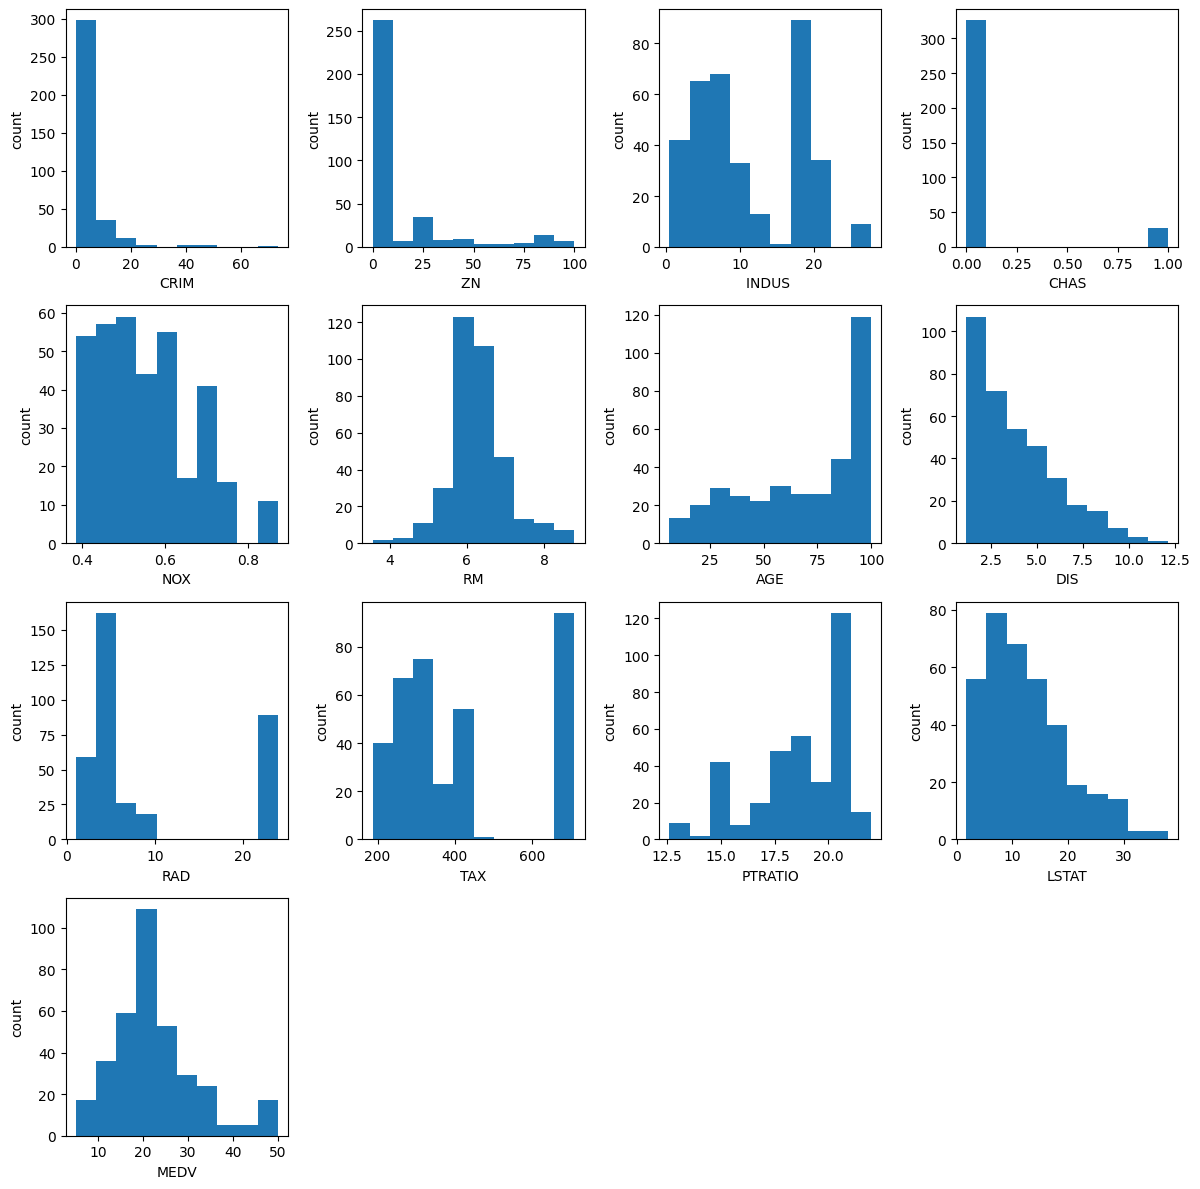

In [12]:
fig = plt.figure(figsize = (12,12))
i = 1
for column in df_train.columns:
    plt.subplot(4,4,i)
    plt.hist(data = df_train, x= column)
    plt.xlabel(column)
    plt.ylabel('count')
    i = i + 1
plt.tight_layout()

plt.show()



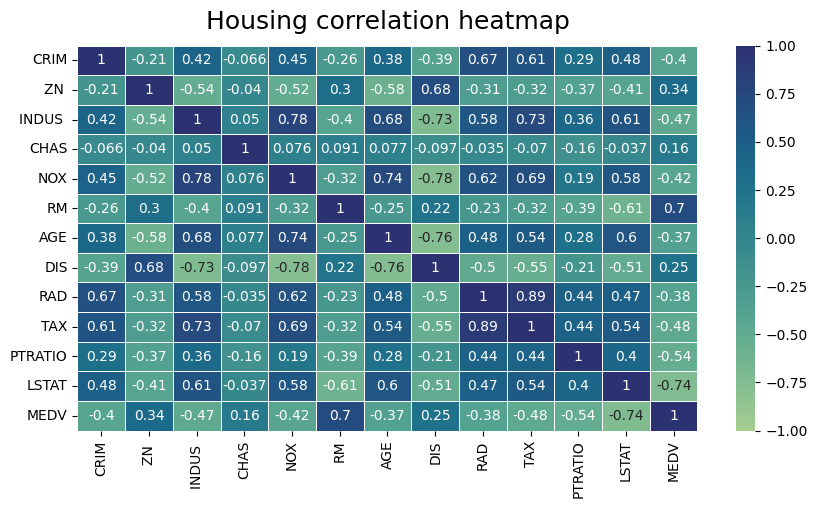

In [41]:
#plotting the heatmap
import seaborn as sns
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(df_train.corr(),vmin = -1, vmax = 1, annot = True , cmap="crest", linewidth=.7)
heatmap.set_title('Housing correlation heatmap', fontdict = {'fontsize':18 }, pad = 12);

<Figure size 500x500 with 0 Axes>

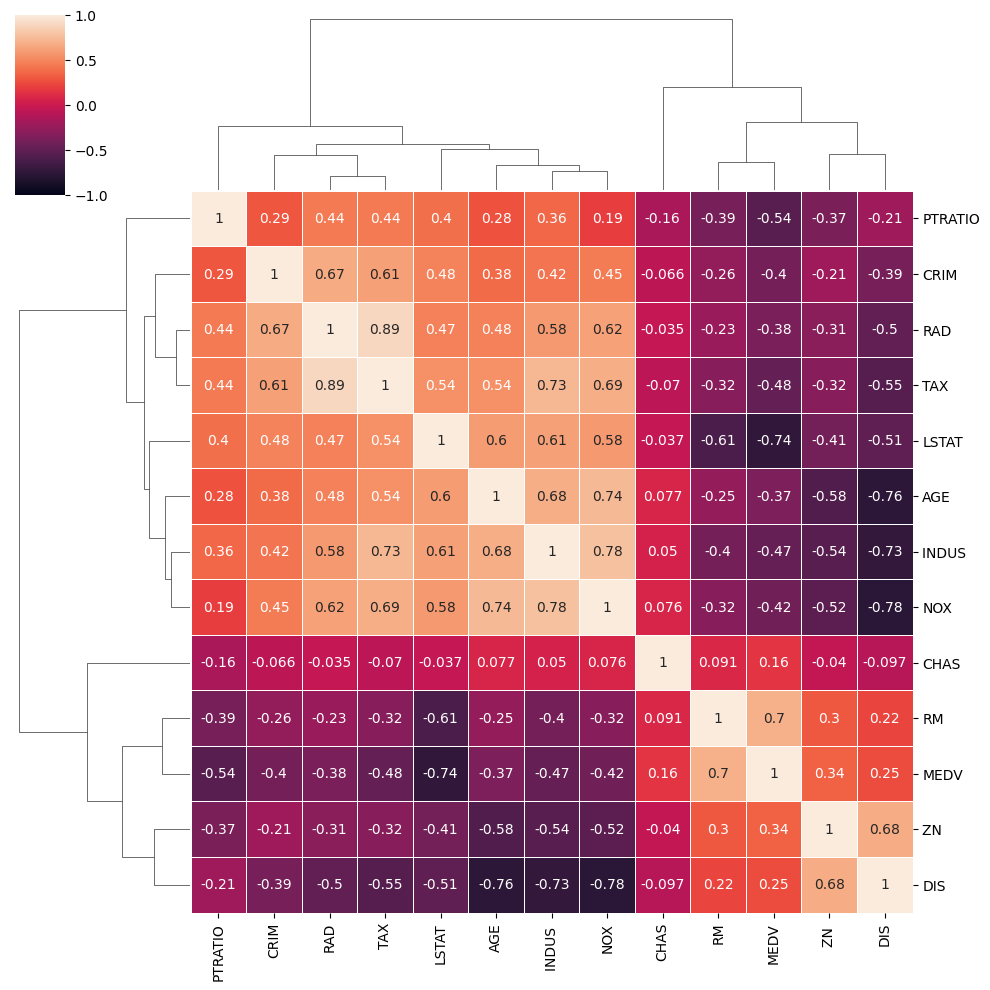

In [45]:
plt.figure(figsize = (5,5))
clustermap = sns.clustermap(df_train.corr(), vmin = -1, vmax = 1, annot = True, linewidth=.7);


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X2 = X_train
  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif2_data)

    Feature        VIF
0      CRIM   2.337633
1       ZN    2.876467
2    INDUS   15.784552
3      CHAS   1.173291
4       NOX  70.379002
5        RM  68.460438
6       AGE  21.935107
7       DIS  15.586403
8       RAD  13.271487
9       TAX  57.528769
10  PTRATIO  78.747269
11    LSTAT  10.184753


VIF explanation https://chat.openai.com/share/73bf43de-2176-49b3-ae33-d54247169fb5

In [13]:
#split the dataset
X_train = df_train.drop(['MEDV'],axis= 1)
y_train = df_train['MEDV']

X_test = df_test.drop(['MEDV'],axis=1)
y_test = df_test['MEDV']

In [14]:
#set up the pipeline
estimator = LinearRegression()
pipeline = Pipeline([('estimator',estimator)])

#fit the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print('r2', r2)
print('rmse', math.sqrt(mse))

r2 0.6335615244712798
rmse 4.56581264056049


In [15]:
#set up the pipeline
preprcocessor = StandardScaler()
estimator_lr = LinearRegression()
# transformer = PolynomialFeatures(degree = 1,include_bias= True)
feature_selector = RFECV(estimator, scoring= 'neg_mean_squared_error')


pipeline_lr = Pipeline([('preprcocessor',preprcocessor),('feature_selector',feature_selector),('estimator',estimator_lr)])

#fit the model
pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)

r2_lr = r2_score(y_pred, y_test)
mse_lr = mean_squared_error(y_pred, y_test)
print('r2', r2_lr)
print('rmse', math.sqrt(mse_lr))

print(f"Optimal number of features: {pipeline_lr.named_steps['feature_selector'].n_features_}")

r2 0.6335615244712826
rmse 4.5658126405605
Optimal number of features: 12


LinearRegression()
Best parameters found: {}
Best score found: 0.3960601795301292

Estimator: lr
CV_validation_set_R2: 0.396
R-squared: 0.704
RMSE: 4.672

RandomForestRegressor()
Best parameters found: {'estimator__max_depth': 5, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 100}
Best score found: 0.6403716936439499

Estimator: rf
CV_validation_set_R2: 0.626
R-squared: 0.821
RMSE: 3.633



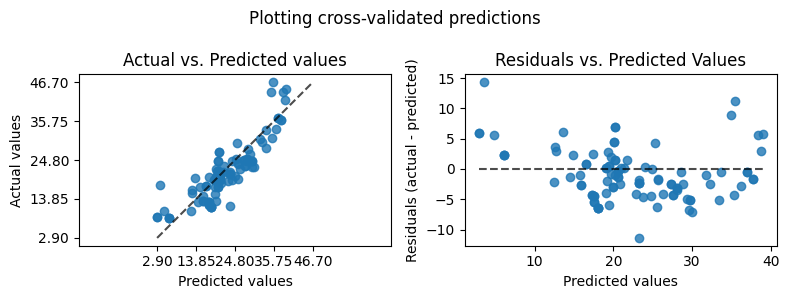

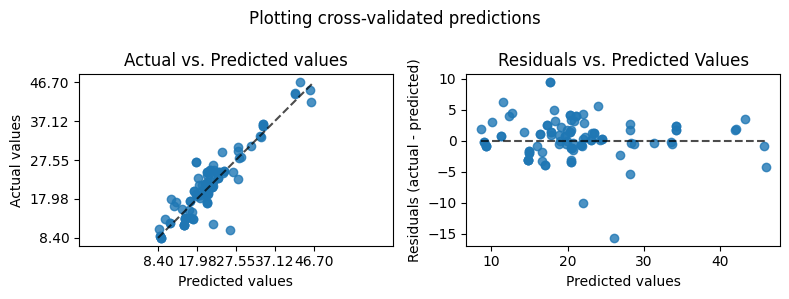

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
import math

#set up the pipeline
numerical_features = X_train.drop(['CHAS'], axis= 1).columns
numerical_transformer = Pipeline([('scaler',StandardScaler())])
preprcocessor = ColumnTransformer([('num', numerical_transformer, numerical_features)])


estimators = [('lr', LinearRegression()),
              ('rf',RandomForestRegressor())
              ]


for estimator_name, estimator in estimators:
    if estimator_name == 'rf':
        parameters ={
            'estimator__n_estimators' : [100,300],
            'estimator__max_depth' : [5],
            'estimator__min_samples_split' : [10]
        }
    else:
        #No parameter grid for other estimators
        parameters ={}
        
    feature_selector = RFECV(estimator, scoring= 'neg_mean_squared_error')
    pipeline = Pipeline([('preprcocessor',preprcocessor),
                         ('feature_selector',feature_selector),
                         ('estimator',estimator),
                         ])

    #Grid search optimization
    grid_search_estimator = GridSearchCV(pipeline, parameters,scoring = 'r2')
    cross_val_train_r2 = cross_val_score(grid_search_estimator,X_train,y_train, scoring='r2', cv = 5)

    # Fit the model
    grid_search_estimator.fit(X_train, y_train)
    y_pred = grid_search_estimator.predict(X_test)

    print(estimator)
    print("Best parameters found:", grid_search_estimator.best_params_)
    print("Best score found:", grid_search_estimator.best_score_)
    print("")


    # Evaluation
    cv_r2 = cross_val_train_r2.mean()
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'Estimator: {estimator_name}')
    print(f'CV_validation_set_R2: {cv_r2:.3f}')
    print(f'R-squared: {r2:.3f}')
    print(f'RMSE: {math.sqrt(mse):.3f}')
    print(f'Optimal number of features: {pipeline.named_steps["feature_selector"].n_features_}\n')
    print("")

    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=100,
        ax=axs[0],
        random_state=0,
    )
    axs[0].set_title("Actual vs. Predicted values")
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=y_pred,
        kind="residual_vs_predicted",
        subsample=100,
        ax=axs[1],
        random_state=0,
    )
    axs[1].set_title("Residuals vs. Predicted Values")
    fig.suptitle("Plotting cross-validated predictions")
    plt.tight_layout()
plt.show()

LinearRegression()
Best parameters found: {}
Best score found: 0.3960601795301292

Estimator: lr
R2_squared_cv_validation_set: 0.396
R-squared: 0.704
RMSE: 4.672
Optimal number of features: 11

RandomForestRegressor()
Best parameters found: {'estimator__max_depth': 5, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 300}
Best score found: 0.6385136875709381

Estimator: rf
R2_squared_cv_validation_set: 0.637
R-squared: 0.813
RMSE: 3.710
Optimal number of features: 7



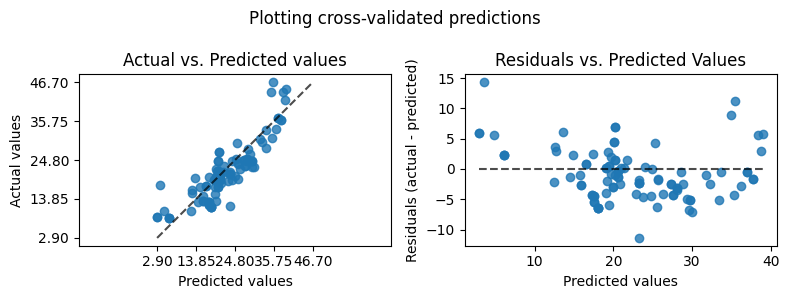

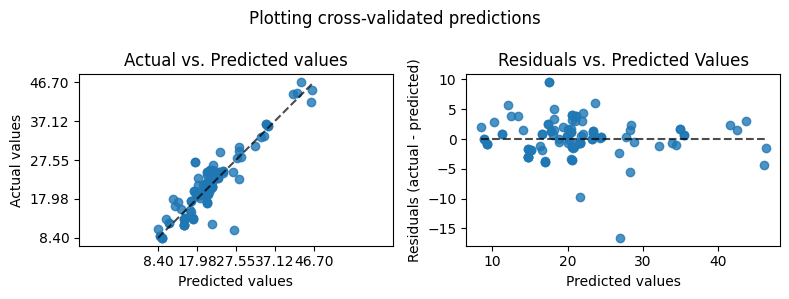

RandomForestRegressor()
Best parameters found: {'estimator_knn__n_neighbors': 5}
Best score found: 0.4882995694591137

Estimator: rf
R2_squared_cv_validation_set: 0.488
R-squared: 0.796
RMSE: 3.878


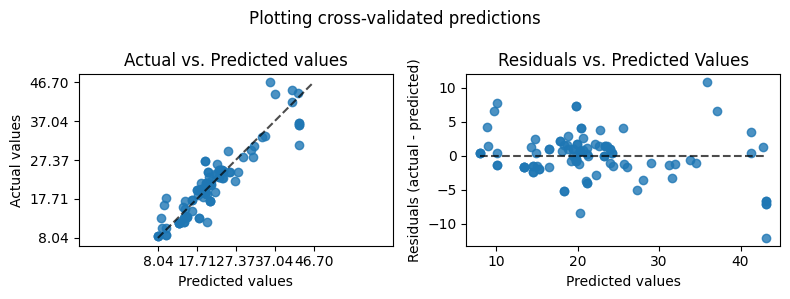

In [81]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.inspection import PredictionErrorDisplay
import numpy as np

# Set up the pipeline
numerical_features = X_train.drop(['CHAS'], axis=1).columns
numerical_transformer = Pipeline([('scaler', StandardScaler())])
preprocessor = ColumnTransformer([('num', numerical_transformer, numerical_features)])

estimators = [('lr', LinearRegression()), ('rf', RandomForestRegressor())]


for estimator_name, estimator in estimators:
    if estimator_name == 'rf':
        parameters = {
            'estimator__n_estimators': [300],
            'estimator__max_depth': [5],
            'estimator__min_samples_split': [10]
        }
    else:
        # No parameter grid for other estimators
        parameters = {}

    feature_selector = RFECV(estimator, step = 1, cv =5 ,scoring='neg_mean_squared_error')
    pipeline = Pipeline([('preprocessor', preprocessor),
                         ('feature_selector', feature_selector),
                         ('estimator', estimator)])

    # Grid search optimization
    grid_search_estimator = GridSearchCV(pipeline, parameters, scoring='r2')
    grid_search_estimator.fit(X_train, y_train)
    y_pred = grid_search_estimator.predict(X_test)

    print(estimator)
    print("Best parameters found:", grid_search_estimator.best_params_)
    print("Best score found:", grid_search_estimator.best_score_)
    print("")

    # Evaluation
    cross_val_train_r2 = cross_val_score(grid_search_estimator, X_train, y_train, scoring='r2', cv=5)
    cv_r2 = np.mean(cross_val_train_r2)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'Estimator: {estimator_name}')
    print(f'R2_squared_cv_validation_set: {cv_r2:.3f}')
    print(f'R-squared: {r2:.3f}')
    print(f'RMSE: {math.sqrt(mse):.3f}')
    pipeline.fit(X_train, y_train)
    print(f'Optimal number of features: {pipeline.named_steps["feature_selector"].n_features_}\n')

    # Plotting
    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=100,
        ax=axs[0],
        random_state=0,
    )
    axs[0].set_title("Actual vs. Predicted values")
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=y_pred,
        kind="residual_vs_predicted",
        subsample=100,
        ax=axs[1],
        random_state=0,
    )
    axs[1].set_title("Residuals vs. Predicted Values")
    fig.suptitle("Plotting cross-validated predictions")
    plt.tight_layout()
plt.show()

Estimator KNN
Best parameters found: {'estimator_knn__n_neighbors': 9}
Best score found: 0.5523740383082771

knn
R2_squared_cv_validation_set: 0.543
R-squared: 0.780
RMSE: 4.025


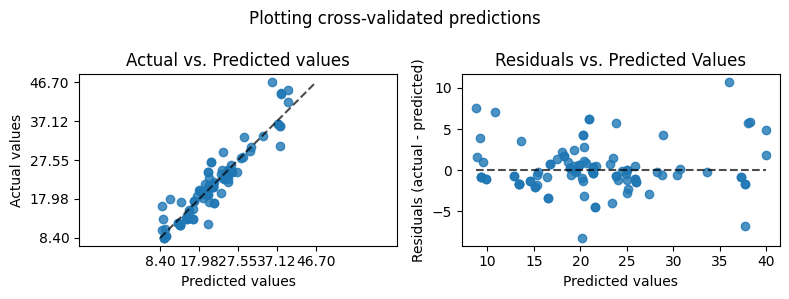

In [86]:
# KNN Pipeline
pipeline_knn = Pipeline([('preprocessor', preprocessor),
                         ('estimator_knn', KNeighborsRegressor(n_neighbors = 3))])

parameters = {'estimator_knn__n_neighbors': [7,8,9]}

grid_search_estimator = GridSearchCV(pipeline_knn, parameters, scoring='r2')
grid_search_estimator.fit(X_train, y_train)
y_pred = grid_search_estimator.predict(X_test)

print("Estimator", 'KNN')
print("Best parameters found:", grid_search_estimator.best_params_)
print("Best score found:", grid_search_estimator.best_score_)
print("")

# Evaluation
cross_val_train_r2 = cross_val_score(grid_search_estimator, X_train, y_train, scoring='r2', cv=5)
cv_r2 = np.mean(cross_val_train_r2)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('knn')
print(f'R2_squared_cv_validation_set: {cv_r2:.3f}')
print(f'R-squared: {r2:.3f}')
print(f'RMSE: {math.sqrt(mse):.3f}')
pipeline.fit(X_train, y_train)

# Plotting
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

#### Lasso and Ridge

In [87]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to calculate AIC
def calculate_aic(y_true, y_pred, num_params):
    rss = mean_squared_error(y_true, y_pred) * len(y_true)
    aic = 2 * num_params - 2 * np.log(rss)
    return aic

# Define a function to calculate BIC
def calculate_bic(y_true, y_pred, num_params):
    rss = mean_squared_error(y_true, y_pred) * len(y_true)
    bic = np.log(len(y_true)) * num_params - 2 * np.log(rss)
    return bic

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)
y = X.dot(np.random.rand(10)) + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define a range of alpha values for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store AIC and BIC values
lasso_aic_values = []
ridge_aic_values = []
lasso_bic_values = []
ridge_bic_values = []

# Fit Lasso and Ridge regression models with different alpha values
for alpha in alpha_values:
    # Lasso regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)
    lasso_num_params = np.count_nonzero(lasso_model.coef_) + 1  # +1 for intercept
    lasso_aic = calculate_aic(y_test, lasso_pred, lasso_num_params)
    lasso_bic = calculate_bic(y_test, lasso_pred, lasso_num_params)
    lasso_aic_values.append(lasso_aic)
    lasso_bic_values.append(lasso_bic)
    
    # Ridge regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)
    ridge_num_params = len(ridge_model.coef_) + 1  # +1 for intercept
    ridge_aic = calculate_aic(y_test, ridge_pred, ridge_num_params)
    ridge_bic = calculate_bic(y_test, ridge_pred, ridge_num_params)
    ridge_aic_values.append(ridge_aic)
    ridge_bic_values.append(ridge_bic)

# Find the minimum AIC and BIC values for Lasso and Ridge regression
min_lasso_aic = min(lasso_aic_values)
min_lasso_bic = min(lasso_bic_values)
min_ridge_aic = min(ridge_aic_values)
min_ridge_bic = min(ridge_bic_values)

# Print the results
print("Minimum AIC for Lasso regression:", min_lasso_aic)
print("Minimum BIC for Lasso regression:", min_lasso_bic)
print("Minimum AIC for Ridge regression:", min_ridge_aic)
print("Minimum BIC for Ridge regression:", min_ridge_bic)

# Select the model with the minimum AIC or BIC
selected_model = "Lasso" if min_lasso_aic < min_ridge_aic else "Ridge"
print("Selected model based on AIC:", selected_model)
selected_model = "Lasso" if min_lasso_bic < min_ridge_bic else "Ridge"
print("Selected model based on BIC:", selected_model)


Minimum AIC for Lasso regression: -3.97880804731538
Minimum BIC for Lasso regression: -2.983075773761389
Minimum AIC for Ridge regression: 15.440127511449546
Minimum BIC for Ridge regression: 26.393182520543448
Selected model based on AIC: Lasso
Selected model based on BIC: Lasso


### Chatgpt

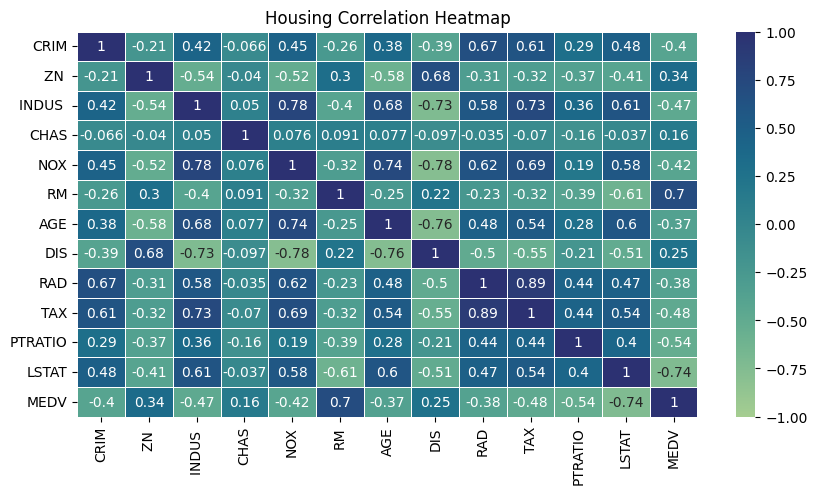

             CRIM       ZN     INDUS       CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.208750  0.419638 -0.065900  0.450277 -0.258770  0.376127   
ZN      -0.208750  1.000000 -0.537947 -0.039862 -0.518749  0.299204 -0.578254   
INDUS    0.419638 -0.537947  1.000000  0.050109  0.775061 -0.398913  0.683227   
CHAS    -0.065900 -0.039862  0.050109  1.000000  0.076030  0.090872  0.077278   
NOX      0.450277 -0.518749  0.775061  0.076030  1.000000 -0.319504  0.737266   
RM      -0.258770  0.299204 -0.398913  0.090872 -0.319504  1.000000 -0.250435   
AGE      0.376127 -0.578254  0.683227  0.077278  0.737266 -0.250435  1.000000   
DIS     -0.392779  0.678070 -0.732278 -0.096789 -0.776429  0.220229 -0.761889   
RAD      0.665593 -0.307329  0.578691 -0.035208  0.624954 -0.230929  0.475376   
TAX      0.609676 -0.315679  0.732400 -0.070325  0.685234 -0.316618  0.540931   
PTRATIO  0.290610 -0.367987  0.361977 -0.161134  0.192028 -0.392654  0.278861   
LSTAT    0.477267 -0.409649 

In [109]:
# Code for exploratory data analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectFwe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

# Load and visualize data
df_train = pd.read_csv('housing_train.csv', delimiter=';')
df_test = pd.read_csv('housing_test.csv', delimiter=';')

#split the dataset
X_train = df_train.drop(['MEDV'],axis= 1)
y_train = df_train['MEDV']

X_test = df_test.drop(['MEDV'],axis=1)
y_test = df_test['MEDV']

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap="crest", linewidth=.7)
plt.title('Housing Correlation Heatmap')
plt.show()

print(df_train.corr())

In [94]:
# Code for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV

# F Statistics, FWE Selector
f_values, p_values = f_regression(X_train, y_train)
selected_features = SelectFwe(alpha=0.05).fit(X_train, y_train).get_support()

# VIF
vif = [variance_inflation_factor(X_train.values, i) 
        for i in range(X_train.shape[1])]

# REFCV
rfe = RFECV(estimator=LinearRegression())
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

# Lasso for feature selection
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
selected_features = lasso_cv.coef_ != 0


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFwe, RFECV
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set up pipelines for each model
pipelines = {
    'Linear Regression': Pipeline([('feature_selection', SelectFwe(alpha=0.05)),
                                   ('model', LinearRegression())]),
    'Ridge Regression': Pipeline([('feature_selection', RFECV(estimator=LinearRegression(), min_features_to_select=5)),
                                  ('model', Ridge())]),

    'Lasso Regression': Pipeline([('feature_selection', SelectFwe(alpha=0.05)),  # Using SelectFwe for Lasso feature selection
                                  ('model', LassoCV(cv=5))]),

    'Random Forest': Pipeline([('feature_selection', SelectFwe(alpha=0.05)),
                               ('model', RandomForestRegressor())]),
    'KNN Regression': Pipeline([('feature_selection', SelectFwe(alpha=0.05)),
                                ('model', KNeighborsRegressor())])
}

# Define parameters for GridSearchCV
params = {
    'Linear Regression': {},
    'Ridge Regression': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'model__n_alphas': [10, 20, 100]},
    'Random Forest': {'model__n_estimators': [100, 300]},
    'KNN Regression': {'model__n_neighbors': [3, 5, 7]}
}

# Evaluate each model using GridSearchCV
best_estimators = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, params[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

# Compare performance
for model_name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name}: RMSE = {rmse}, R2 Score = {r2}')


Linear Regression: RMSE = 5.001253883005989, R2 Score = 0.6605609309096919
Ridge Regression: RMSE = 4.650514423734386, R2 Score = 0.7065014121941263
Lasso Regression: RMSE = 5.480061130604511, R2 Score = 0.592455693064524
Random Forest: RMSE = 3.4956992109854386, R2 Score = 0.8341665493612381
KNN Regression: RMSE = 5.6756068537113045, R2 Score = 0.562851861365617
